In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import networkx as nx
import copy
import utils

In [2]:
nodes_gdf = gpd.read_file('Scigrid_data/IGGIN_Nodes.geojson')
nodes_gdf.head()

,name,id,country_code,tags,param,method,geometry
0,N_0,NO_N_0,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (6.79720 65.10640)
1,N_1,NO_N_1,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (5.19357 59.33286)
2,N_2,NO_N_2,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (2.89575 60.56023)
3,N_3,NO_N_3,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (2.89614 60.78219)
4,N_4,NO_N_4,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (3.29837 54.78877)


In [3]:
pipelines_df = utils.get_IGGIN_pipeline_data()
pipelines_df.head()

,id,name,source_id,lat,long,comment,tags,geometry,diameter_mm,end_year,...,method_long_mean,method_max_cap_M_m3_per_d,method_max_pressure_bar,method_num_compressor,method_start_year,method_waterDepth_m,country_code_1,country_code_2,node_id_1,node_id_2
0,INET_PL_1,AlcazarDeSanJuan_Chinchilla,['INET_PL_1'],"[39.3900748, 38.892435]","[-3.3500984, -1.719831]",None,{},None,923.792529,2050,...,make_Attrib(latlong_mean),Lasso,Median,Median,make_Attrib(const),Lasso,ES,ES,INET_N_23,INET_N_295
1,INET_PL_3,Tarancon_Madrid,['INET_PL_3'],"[40.01, 40.223]","[-3.207, -3.681]",None,{},None,923.792529,2050,...,make_Attrib(latlong_mean),Lasso,Median,Median,make_Attrib(const),Lasso,ES,ES,INET_N_1460,INET_N_904
2,INET_PL_5,Alessandria_Cortemaggiore,['INET_PL_5'],"[44.991076, 44.90008]","[9.920891, 8.60944]",None,{},None,914.400000,2050,...,make_Attrib(latlong_mean),Lasso,raw,Median,make_Attrib(const),Lasso,IT,IT,INET_N_317,INET_N_26
3,INET_PL_7,Almendralejo_Badajoz,['INET_PL_7'],"[38.711202, 38.87665]","[-6.382539, -6.9714]",None,{},None,923.792529,2050,...,make_Attrib(latlong_mean),Lasso,Median,Median,make_Attrib(const),Lasso,ES,ES,INET_N_36,INET_N_108
4,INET_PL_9,Almendralejo_Zamora,['INET_PL_9'],"[38.711202, 41.506]","[-6.382539, -5.644]",None,{},None,923.792529,2050,...,make_Attrib(latlong_mean),Lasso,Median,Median,make_Attrib(const),Lasso,ES,ES,INET_N_36,INET_N_1653


### Connecting Norwegian grid to the continent

In [4]:
# Dunkerque
pipelines_df.loc[pipelines_df['node_id_1'] == 'NO_N_33', 'node_id_1'] = 'INET_N_407'
pipelines_df.loc[pipelines_df['node_id_2'] == 'NO_N_33', 'node_id_2'] = 'INET_N_407'

# Zeebrugge
pipelines_df.loc[pipelines_df['node_id_1'] == 'NO_N_5', 'node_id_1'] = 'INET_N_1656'
pipelines_df.loc[pipelines_df['node_id_2'] == 'NO_N_5', 'node_id_2'] = 'INET_N_1656'

# Dornum
pipelines_df.loc[pipelines_df['node_id_1'] == 'NO_N_27', 'node_id_1'] = 'INET_N_379'
pipelines_df.loc[pipelines_df['node_id_2'] == 'NO_N_27', 'node_id_2'] = 'INET_N_379'
pipelines_df.loc[pipelines_df['node_id_1'] == 'Storages_0', 'node_id_1'] = 'INET_N_379'
pipelines_df.loc[pipelines_df['node_id_2'] == 'Storages_0', 'node_id_2'] = 'INET_N_379'

# Emden
pipelines_df.loc[pipelines_df['node_id_1'] == 'NO_N_19', 'node_id_1'] = 'INET_N_436'
pipelines_df.loc[pipelines_df['node_id_2'] == 'NO_N_19', 'node_id_2'] = 'INET_N_436'

# Easington
pipelines_df.loc[pipelines_df['node_id_1'] == 'NO_N_39', 'node_id_1'] = 'INET_N_410'
pipelines_df.loc[pipelines_df['node_id_2'] == 'NO_N_39', 'node_id_2'] = 'INET_N_410'

# St. Fergus
pipelines_df.loc[pipelines_df['node_id_1'] == 'NO_N_24', 'node_id_1'] = 'INET_N_1401'
pipelines_df.loc[pipelines_df['node_id_2'] == 'NO_N_24', 'node_id_2'] = 'INET_N_1401'

# In the nodes_gdf, drop the rows with the following ids
nodes_gdf = nodes_gdf[nodes_gdf['id'] != 'NO_N_33']
nodes_gdf = nodes_gdf[nodes_gdf['id'] != 'NO_N_5']
nodes_gdf = nodes_gdf[nodes_gdf['id'] != 'NO_N_27']
nodes_gdf = nodes_gdf[nodes_gdf['id'] != 'NO_N_19']
nodes_gdf = nodes_gdf[nodes_gdf['id'] != 'NO_N_39']
nodes_gdf = nodes_gdf[nodes_gdf['id'] != 'NO_N_24']
nodes_gdf = nodes_gdf[nodes_gdf['id'] != 'Storages_0']

### Add attributes (physical properties) to pipelines

In [5]:
# Create a graph of the pipeline network
G = nx.DiGraph()

# Add the nodes to the graph
for i, row in nodes_gdf.iterrows():
    G.add_node(row['id'], pos=(row['geometry'].x, row['geometry'].y), country_code=row['country_code'], is_country_node=False)

# Add the edges to the graph
for i, row in pipelines_df.iterrows():
    if row['node_id_1'] == row['node_id_2']:
        continue
    G.add_edge(row['node_id_1'], row['node_id_2'], diameter_mm = row['diameter_mm'], 
                                                   length_km = row['length_km'], 
                                                    capacity= row['max_cap_M_m3_per_d'],
                                                    max_pressure_bar = row['max_pressure_bar'],
                                                    num_compresson = row['num_compressor'],
                                                    water_depth_m = row['waterDepth_m'],
                                                    is_bothDirection = row['is_bothDirection'],
                                                    start_year= row['start_year'],
                                                    end_year= row['end_year'],
                                                    country_code_1= row['country_code_1'],
                                                    country_code_2= row['country_code_2'],
                                                    name= row['name'])
    if row['is_bothDirection']:
        G.add_edge(row['node_id_2'], row['node_id_1'], diameter_mm = row['diameter_mm'], 
                                                   length_km = row['length_km'], 
                                                    capacity= row['max_cap_M_m3_per_d'],
                                                    max_pressure_bar = row['max_pressure_bar'],
                                                    num_compresson = row['num_compressor'],
                                                    water_depth_m = row['waterDepth_m'],
                                                    is_bothDirection = row['is_bothDirection'],
                                                    start_year= row['start_year'],
                                                    end_year= row['end_year'],
                                                    country_code_1= row['country_code_2'],
                                                    country_code_2= row['country_code_1'],
                                                    name= row['name'])

In [14]:
# Print pipelines where country_code_1 is 'NO' and country_code_2 is 'GB'
for row in pipelines_df.itertuples():
    if row.country_code_1 == 'NO' and row.country_code_2 == 'GB':
        # Print the node ids and the name of the pipeline
        print(row.node_id_1, row.node_id_2, row.name)

44 Gas SLEIPNER R, EASINGTON


### Add country nodes to the grid

In [6]:
G_with_country_nodes = G.copy()

country_positions = {}

for node_id, node_data in G_with_country_nodes.nodes(data=True):
    country_code = node_data.get('country_code')
    if country_code is not None:
        country_code = str.strip(country_code.upper())
    
    if country_code not in country_positions:
        country_positions[country_code] = []
    country_positions[country_code].append(node_data['pos'])

for country_code, positions in country_positions.items():
    average_position = np.mean(positions, axis=0)
    G_with_country_nodes.add_node(country_code, pos=average_position, is_country_node=True, country_code=country_code)

for node_id, node_data in G_with_country_nodes.nodes(data=True):
    if 'country_node' in node_data:
        G_with_country_nodes.remove_node(node_id)

### Direct dead-end flow from nodes to their respective country nodes 

In [7]:
# Get the list of country nodes
country_nodes = [node_id for node_id, node_data in G_with_country_nodes.nodes(data=True) if node_data.get('is_country_node')]

# Iterate over each node in the graph
for node_id, node_data in G_with_country_nodes.nodes(data=True):
    # Skip country nodes
    if node_data.get('is_country_node'):
        continue
    
    # Get the country code of the node
    country_code = node_data.get('country_code')
    
    # Find the corresponding country super node
    country_super_node = next((cn for cn in country_nodes if G_with_country_nodes.nodes[cn]['country_code'] == country_code), None)
    
    if country_super_node:
        # Check if the node is a sink (only incoming edges)
        if G_with_country_nodes.in_degree(node_id) > 0 and G_with_country_nodes.out_degree(node_id) == 0:
            # Calculate the aggregate in-degree capacity of the child node
            aggregate_in_capacity = sum(G_with_country_nodes.edges[neighbor, node_id]['capacity'] for neighbor in G_with_country_nodes.predecessors(node_id))
            
            # Add an edge directed towards the country node from the node with the aggregate in-degree capacity
            G_with_country_nodes.add_edge(node_id, country_super_node, capacity = aggregate_in_capacity)
        
        
        # Check if the node is a source (only outgoing edges)
        if G_with_country_nodes.in_degree(node_id) == 0 and G_with_country_nodes.out_degree(node_id) > 0:
            # Calculate the aggregate out-degree capacity of the child node
            aggregate_out_capacity = sum(G_with_country_nodes.edges[node_id, neighbor]['capacity'] for neighbor in G_with_country_nodes.successors(node_id))
            
            # Add an edge directed towards the node from the country node with the aggregate out-degree capacity
            G_with_country_nodes.add_edge(country_super_node, node_id, capacity = aggregate_out_capacity) 


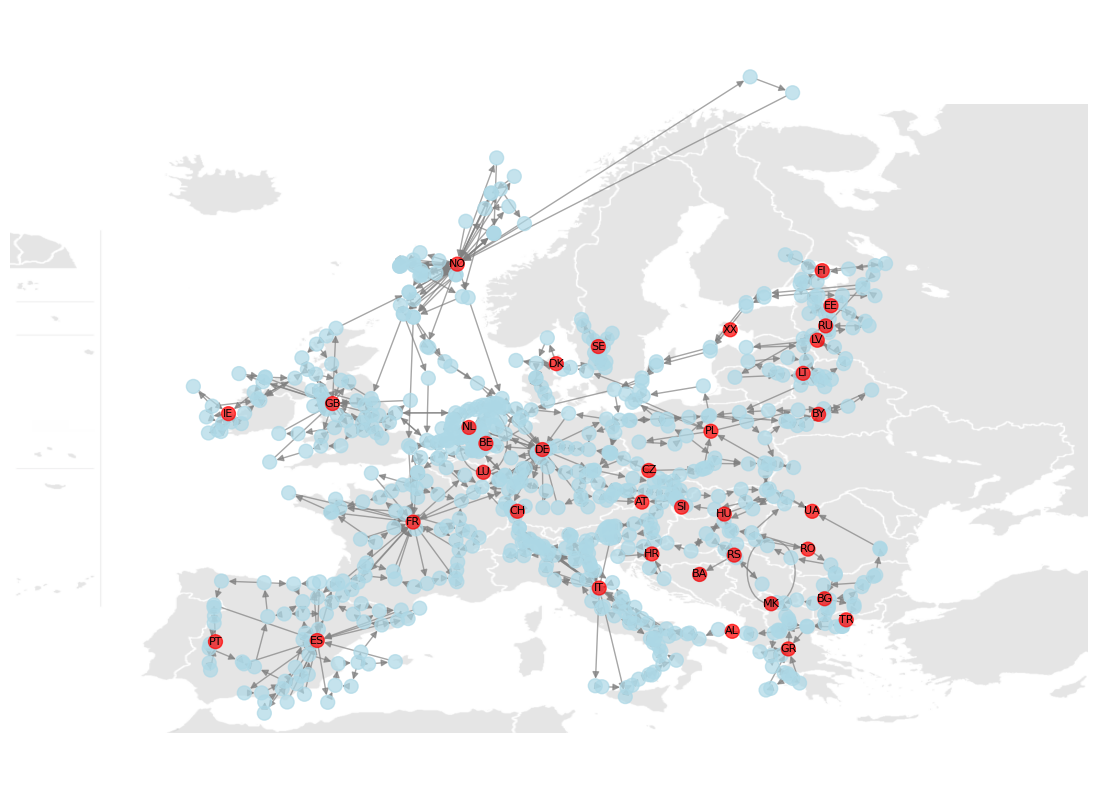

In [8]:
import matplotlib.image as mpimg
europe_map = mpimg.imread('Europe_blank_map.png')

plt.figure(figsize=(15, 10))
plt.imshow(europe_map, extent=[-20, 40, 35, 70], alpha=0.5)

pos = nx.get_node_attributes(G_with_country_nodes, 'pos')
node_colors = ['red' if G_with_country_nodes.nodes[node_id].get('is_country_node') else 'lightblue' for node_id in G_with_country_nodes.nodes]
nx.draw(G_with_country_nodes, pos=pos, with_labels=False, node_size=100, node_color=node_colors, edge_color='gray', width=1, alpha=0.7)

country_nodes = [node_id for node_id, node_data in G_with_country_nodes.nodes(data=True) if node_data.get('is_country_node')]
nx.draw_networkx_labels(G_with_country_nodes, pos=pos, labels={node_id: node_id for node_id in country_nodes}, font_color='black', font_size=8)

plt.show()

### Max flow testing

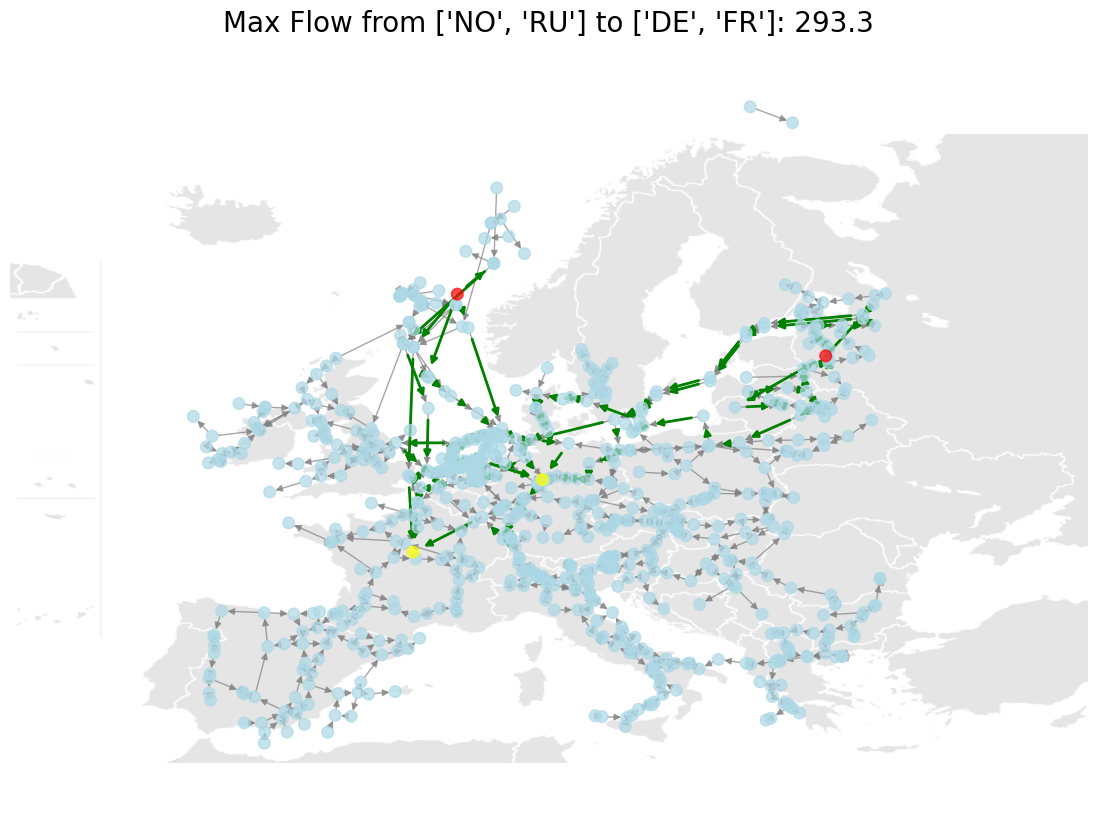

In [9]:
super_sources = ['NO', 'RU']
super_sinks = ['DE', 'FR']

flow_val, flow_dict, flow_edges = utils.max_flow(G_with_country_nodes, super_sources, super_sinks)

### Cai et al. 2021
Capacity robustnes based on maximum flow.

In [11]:
import random

def W(flow_dict):
    """ 
    Computes flow matrix W after running max flow algorithm on the graph.
    Defined in Cai et al. (2021) as the flow matrix of the network prior to any node removal.
    
    Returns:
        flow_matrix: 2D numpy array representing the flow matrix
        node_indices: Dictionary mapping nodes to their corresponding indices
    """
    nodes = list(flow_dict.keys())
    num_nodes = len(nodes)
    node_indices = {node: i for i, node in enumerate(nodes)}
    flow_matrix = np.zeros((num_nodes, num_nodes))
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                flow_matrix[i, j] = flow_dict.get(nodes[i], {}).get(nodes[j], 0)
    
    return flow_matrix, node_indices


def W_c(flow_matrix, target, node_indices):
    """
    Computes the flow matrix W_c after removing a node.
    Defined in Cai et al. (2021) as the original flow matrix of the network after removing entry corresponding to the removed node.

    Parameters:
        flow_matrix: Flow matrix of the original graph
        target: Target can be either a single node or an edge in the form (v1, v2)
        node_indices: Dictionary mapping nodes to their indices in the flow matrix

    Returns:
        flow_matrix_c: Flow matrix after removing the specified node
        modified_flow_matrix: Modified flow matrix
    """

    modified_flow_matrix = np.copy(flow_matrix)

    if isinstance(target, (set,tuple)) and len(target) == 2:
        # Target is an edge in the form (v1, v2)
        v1, v2 = target
        index_v1 = node_indices.get(v1, None)
        index_v2 = node_indices.get(v2, None)

        if index_v1 is not None and index_v2 is not None:
            modified_flow_matrix[index_v1, index_v2] = 0
            modified_flow_matrix[index_v2, index_v1] = 0
    
    else:
        # Target is a single node
        removed_node_index = node_indices.get(target, None)

        # Exclude the row and column corresponding to the removed node
        modified_flow_matrix = np.delete(modified_flow_matrix, removed_node_index, axis=0)
        modified_flow_matrix = np.delete(modified_flow_matrix, removed_node_index, axis=1)

    return modified_flow_matrix


In [30]:
def check_validity(heuristic, remove, k_removals):
        if heuristic not in ['random', 'greedy', 'max_flow']:
            raise ValueError("Invalid heuristic")
        if remove not in ['node', 'edge']:
            raise ValueError("Invalid removal type")
        if not isinstance(k_removals, int) or k_removals < 1:
            raise ValueError("Invalid number of removals")
        if remove=='edge' and G.number_of_edges() < k_removals:
            raise ValueError("Too many edges to remove")
        
        if remove=='node' and G.number_of_nodes() < k_removals:
            raise ValueError("Too many nodes to remove")
        

def flow_capacity_robustness(G_, sources, sinks, k_removals, heuristic='random', remove='node', n_benchmarks = 100):
    """ 
    Computes the n-k capacity robustness based on maximum flow of a graph
    Defined in Cai et al. (2021) as: sum(W_c_prime) / sum(W_c)
    """

    # Check the validity of the input arguments
    check_validity(heuristic, remove, k_removals)

    G = copy.deepcopy(G_)

    # Remove the country node abstractions from the graph
    country_nodes = [n for n in G.nodes if G.nodes[n].get('is_country_node') and n not in sources and n not in sinks]
    G.remove_nodes_from(country_nodes)

    # Calculate the original flow matrix W of the graph
    flow_val, flow_dict, _ = utils.max_flow(G, sources, sinks, show_plot=False)
    flow_matrix, node_indices = W(flow_dict)

    # Instantiate the results dataframe
    results_df = pd.DataFrame(columns=['max_flow_value', 'capacity_robustness_max_flow', 'removed_entity', 'network_state', 'comment'])
    results_df.loc[0] = [flow_val, 1, None, G, 'No removals made']

    # Helper function to check if a node is valid
    def node_is_valid(node):
        return node not in sources and node not in sinks and node != 'super_source' and node != 'super_sink' and node in G.nodes()
    
    def edge_is_valid(source, sink):
        return source not in sources and sink not in sinks and source != 'super_source' and sink != 'super_sink' and (source, sink) in G.edges() 
    
    if heuristic == 'random':
        G_lst = [G.copy() for _ in range(n_benchmarks)]
        G_flow_matrix_lst = [flow_matrix for _ in range(n_benchmarks)]

    # N-k capacity robustness calculation
    for k in range(1, k_removals + 1):

        if heuristic == 'random':

            max_flow_lst, capacity_robustness_lst = [], []

            for G_copy, G_flow_matrix in zip(G_lst, G_flow_matrix_lst):
                
                if remove == 'edge':
                    raise NotImplementedError

                switch = True
                while switch:
                    target = random.choice(list(G_copy.nodes() if remove == 'node' else G_copy.edges()))
                    if node_is_valid(target):
                        switch = False

                G_copy.remove_node(target) if remove == 'node' else G_copy.remove_edge(*target)

                # Modify the original flow matrix after removing the node, and define the modified flow matrix as per paper
                G_flow_matrix = W_c(G_flow_matrix, target, node_indices)
                W_c_ = G_flow_matrix
               
                # Calculate the flow matrix W_c_prime after removing the node
                current_max_flow_val, current_flow_dict, _ = utils.max_flow(G_copy, sources, sinks, show_plot=False)
                W_c_prime, _ = W(current_flow_dict)

                # Calculate the capacity robustness and append it to the list
                capacity_robustness = np.sum(W_c_prime) / np.sum(W_c_)
                capacity_robustness_lst.append(capacity_robustness)

                # Append the maximum flow value to the list
                max_flow_lst.append(current_max_flow_val)

            target = 'averaged across ' + str(n_benchmarks) + ' benchmarks'

            capacity_robustness = np.mean(capacity_robustness_lst)
            current_max_flow_val = np.mean(max_flow_lst)

            results_df.loc[k] = [current_max_flow_val, capacity_robustness, target, G_copy, 'Specimen graph']

        
        elif heuristic == 'greedy':
            # Project thesis...
            raise NotImplementedError
        

        elif heuristic == 'max_flow':

            if remove == 'edge':

                current_max_flow_val, current_flow_dict, _ = utils.max_flow(G, sources, sinks, show_plot=False)

                max_flow = float(-np.inf)
                target = None


                for source, edges in current_flow_dict.items():
                    for sink, flow in edges.items():
                        if edge_is_valid(source, sink):
                            if flow > max_flow:
                                max_flow = flow
                                target = (source, sink)

                
                G.remove_edge(*target)

                flow_matrix = W_c(flow_matrix, target, node_indices) 
                W_c_ = flow_matrix

                # Calculate the flow matrix W_c_prime after removing the node
                current_max_flow_val, current_flow_dict, _ = utils.max_flow(G, sources, sinks, show_plot=False)
                W_c_prime, _ = W(current_flow_dict)

                capacity_robustness = np.sum(W_c_prime) / np.sum(W_c_)

                results_df.loc[k] = [current_max_flow_val, capacity_robustness, target, G, None]
            
            
        # Other heuristics

        else:
            raise ValueError("Invalid heuristic")


    return results_df

In [31]:

results_df = flow_capacity_robustness(G_with_country_nodes, super_sources, super_sinks, 10, heuristic='max_flow', remove='edge', n_benchmarks=1)
results_df


,max_flow_value,capacity_robustness_max_flow,removed_entity,network_state,comment
0,293.301979,1.000000,None,"(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",No removals made
1,213.301979,0.641250,"(INET_N_1172, INET_N_1052)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
2,209.466342,0.691884,"(INET_N_435, INET_N_1419)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
3,154.466342,0.636509,"(NO_N_32, INET_N_407)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
4,99.671842,0.513261,"(INET_N_435, INET_N_1219)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
5,58.170317,0.346436,"(INET_N_1656, INET_N_912)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
6,12.660000,0.114892,"(INET_N_164, INET_N_387)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
7,0.000000,0.000000,"(INET_N_1287, INET_N_708)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
8,0.000000,0.000000,"(NO_N_0, NO_N_1)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
9,0.000000,0.000000,"(NO_N_1, NO_N_17)","(NO_N_0, NO_N_1, NO_N_2, NO_N_3, NO_N_4, NO_N_...",None
